In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from keras.models import load_model


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing"
df = pd.read_csv(path + '/dataset/created/cleaned_df.csv')

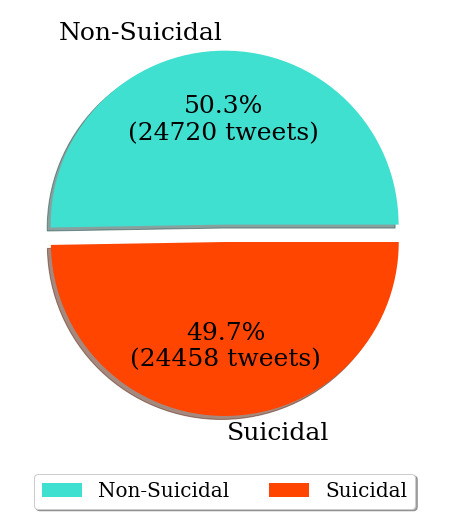

In [ ]:
size = list(df['label'].value_counts())
labels = ['Non-Suicidal', 'Suicidal']
colors = ['turquoise', 'orangered']
explode = [0, 0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} tweets)".format(pct, absolute)

plt.subplots(figsize=(8,8))
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size),textprops={'fontsize': 25})

# plt.title('Percentage of Suicidal & Non Suicidal tweets in dataset', fontsize = 20)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),prop={'size': 20},
          fancybox=True, shadow=True, ncol=5)
plt.savefig(path + "/visualization/destribution.png")
plt.show()

(-0.5, 399.5, 329.5, -0.5)

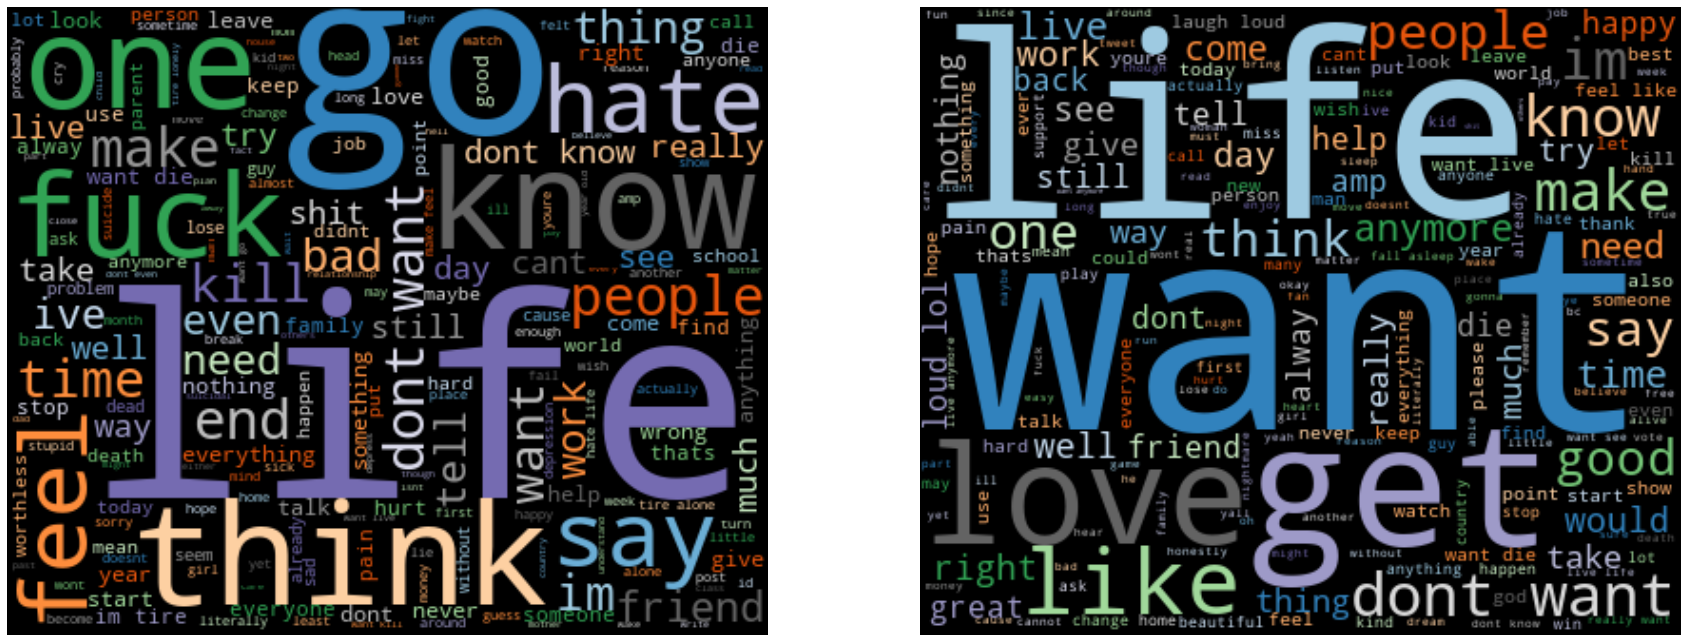

In [ ]:
df.cleaned_text=df['cleaned_text'].astype(str)
tweet_df = df.copy()
comments_mask = np.array(Image.open(path + '/visualization/wordcloud/comment.png'))

# Start with one review:
df_ADR = tweet_df[tweet_df['label']==1]
df_NADR = tweet_df[tweet_df['label']==0]
tweet_All = " ".join(review for review in df.cleaned_text)
tweet_ADR = " ".join(review for review in df_ADR.cleaned_text)
tweet_NADR = " ".join(review for review in df_NADR.cleaned_text)

fig, ax = plt.subplots(1, 2, figsize  = (30,24))
# Create and generate a word cloud image:firebrick
# wordcloud_ALL = WordCloud(width=400, height=330, max_words=50, colormap='tab20c',collocations=True).generate(tweet_All).to_file(path + "/visualization/wordcloud/all.png")
wordcloud_ADR = WordCloud(width=400, height=330, max_words=200,colormap='tab20c',collocations=True).generate(tweet_ADR).to_file(path + "/visualization/wordcloud/suicide_text.png")
wordcloud_NADR = WordCloud(width=400, height=330, max_words=200, colormap='tab20c',stopwords=['end','go'],collocations=True).generate(tweet_NADR).to_file(path + "/visualization/wordcloud/non_suicide.png")

# Display the generated image:
ax[0].imshow(wordcloud_ADR, interpolation='bilinear')
ax[0].axis('off')
ax[1].imshow(wordcloud_NADR, interpolation='bilinear')
ax[1].axis('off')
# ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
# ax[2].axis('off')
